In [67]:
import cv2
import matplotlib.pyplot as plt

In [68]:
def cartoonify(img_path):
  original_img = cv2.imread(img_path)
  original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  ReSized1 = cv2.resize(original_img, (960, 540))


  grayScaleImage = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
  ReSized2 = cv2.resize(grayScaleImage, (960, 540))
  
  blur_img = cv2.medianBlur(grayScaleImage, 5)
  ReSized3 = cv2.resize(blur_img, (960, 540))


  getEdge = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,9,9)
  ReSized4 = cv2.resize(getEdge, (960, 540))

  colored = cv2.bilateralFilter(original_img, 3, 300, 300)
  ReSized5 = cv2.resize(colored, (960, 540))
  
  cartoonImage = cv2.bitwise_and(colored, colored, mask=getEdge)
  ReSized6 = cv2.resize(cartoonImage, (960, 540))

  # plt.figure(figsize=(15,10))
  # plt.imshow(cartoonImage, cmap = 'gray')
  
  images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
  labels = ['original image', 'gray scale image', 'blur image', 'Threshold', 'adding filter', 'cartoon image']

  fig = plt.figure(figsize=(8,8))
  for i in range(0,6):
    ax = fig.add_subplot(3,2, i+1, xticks=[],yticks=[])
    ax.imshow(images[i], cmap='gray')
    ax.set_title(labels[i])

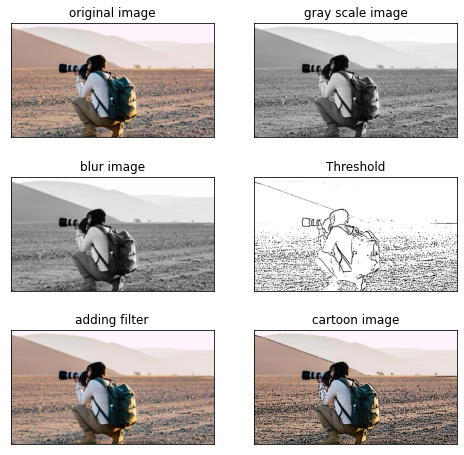

In [69]:
cartoonify('/content/389564.jpg')

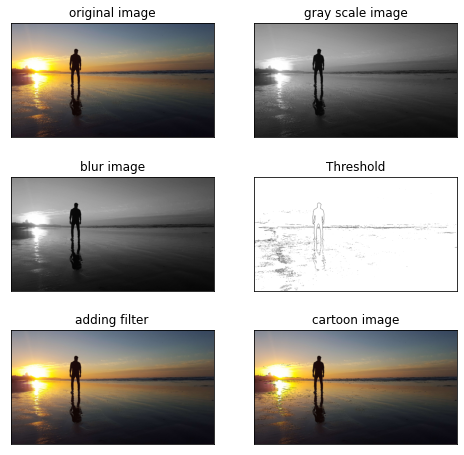

In [66]:
cartoonify('/content/013f5.jpg')